In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [9]:
train_df = pd.read_parquet("../../pipeline/output/train_data/train.parquet")
test_df = pd.read_parquet("../../pipeline/output/test_data/test.parquet")

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\nTrain columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())

print("\nFirst few rows of train data:")
display(train_df.head())

print("\nTrain data types:")
print(train_df.dtypes)

print("\nSample of actual data:")
for col in train_df.columns:
    print(f"{col}: {train_df[col].iloc[0]}")


Train data shape: (25242, 9)
Test data shape: (873, 9)

Train columns: ['id', 'pdb_id', 'chain_id', 'length', 'sequence', 'residue_indices', 'b_factors', 'mean_b_factor', 'coords_ca']
Test columns: ['id', 'pdb_id', 'chain_id', 'length', 'sequence', 'residue_indices', 'b_factors', 'mean_b_factor', 'coords_ca']

First few rows of train data:


,id,pdb_id,chain_id,length,sequence,residue_indices,b_factors,mean_b_factor,coords_ca
0,train_5ZZK_A,5ZZK,A,182,IIALFIGIMYFLSTRDNVDELRKIENKSSFVSADNMPEYVKGAFIS...,"[53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 6...","[85.14, 77.62, 76.17, 79.47, 75.0, 70.62, 73.7...",40.182637,"[1.2070000171661377, 8.534000396728516, 4.9860..."
1,train_7DMN_A,7DMN,A,369,HMSNVTVSAFTVDKSISEEHVLPSSFIPGSGNIFPKFTSAIPKTAW...,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[50.62, 35.37, 23.71, 17.4, 16.88, 16.23, 21.0...",19.384526,"[-26.94499969482422, 0.8389999866485596, -37.9..."
2,train_3C9P_A,3C9P,A,119,NASQKLYNKFAAVYLALIAKVERKGGKAESVHQVTSWLTGYEVSDV...,"[-1, 0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 1...","[32.9, 30.6, 17.94, 15.32, 12.42, 12.38, 13.03...",14.893445,"[18.31999969482422, 7.909999847412109, 7.44799..."
3,train_5UB6_A,5UB6,A,279,SSVLVLGRISDDPASHYEQLKPLLDYVVPRMREVGIRRGEILMAPD...,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[53.04, 40.85, 33.09, 28.5, 25.6, 25.01, 28.54...",29.926882,"[-2.071000099182129, 17.13599967956543, -8.989..."
4,train_5UB6_B,5UB6,B,279,SSVLVLGRISDDPASHYEQLKPLLDYVVPRMREVGIRRGEILMAPD...,"[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[40.88, 31.58, 24.49, 23.83, 22.51, 22.26, 26....",28.117634,"[-61.6349983215332, 15.755999565124512, -47.67..."



Train data types:
id                  object
pdb_id              object
chain_id            object
length               int64
sequence            object
residue_indices     object
b_factors           object
mean_b_factor      float64
coords_ca           object
dtype: object

Sample of actual data:
id: train_5ZZK_A
pdb_id: 5ZZK
chain_id: A
length: 182
sequence: IIALFIGIMYFLSTRDNVDELRKIENKSSFVSADNMPEYVKGAFISMEDERFYNHHTITQQVVKNYFYKELFVAHRVEKQYNKNEILSFYLNNIYFGDNQYTLEGAANHYFGTTVNKNSTTMSHITVLQSAILASKVNAPSVYNINNMSENFTQRVSTNLEKMKQQNYINETQYQQAMSQLN
residue_indices: [ 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 133 134 135 136 137 138 139 140 141 142 143 144 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 19

In [10]:
all_data = pd.concat([train_df, test_df], ignore_index=True)
all_data['split'] = ['train'] * len(train_df) + ['test'] * len(test_df)

print("Combined data shape:", all_data.shape)
print("\nData info:")
all_data.info()

print("\nLength column vs sequence length comparison:")
print("Length column statistics:")
print(all_data['length'].describe())
print("\nActual sequence length statistics:")
seq_lengths = all_data['sequence'].str.len()
print(seq_lengths.describe())

print(f"\nDo 'length' and actual sequence length match? {all_data['length'].equals(seq_lengths)}")

print("\nMean B-factor statistics:")
print(all_data['mean_b_factor'].describe())


Combined data shape: (26115, 10)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26115 entries, 0 to 26114
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               26115 non-null  object 
 1   pdb_id           26115 non-null  object 
 2   chain_id         26115 non-null  object 
 3   length           26115 non-null  int64  
 4   sequence         26115 non-null  object 
 5   residue_indices  26115 non-null  object 
 6   b_factors        26115 non-null  object 
 7   mean_b_factor    26115 non-null  float64
 8   coords_ca        26115 non-null  object 
 9   split            26115 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.0+ MB

Length column vs sequence length comparison:
Length column statistics:
count    26115.000000
mean       273.489259
std        140.786461
min          2.000000
25%        164.000000
50%        251.000000
75%        341.000000
max   

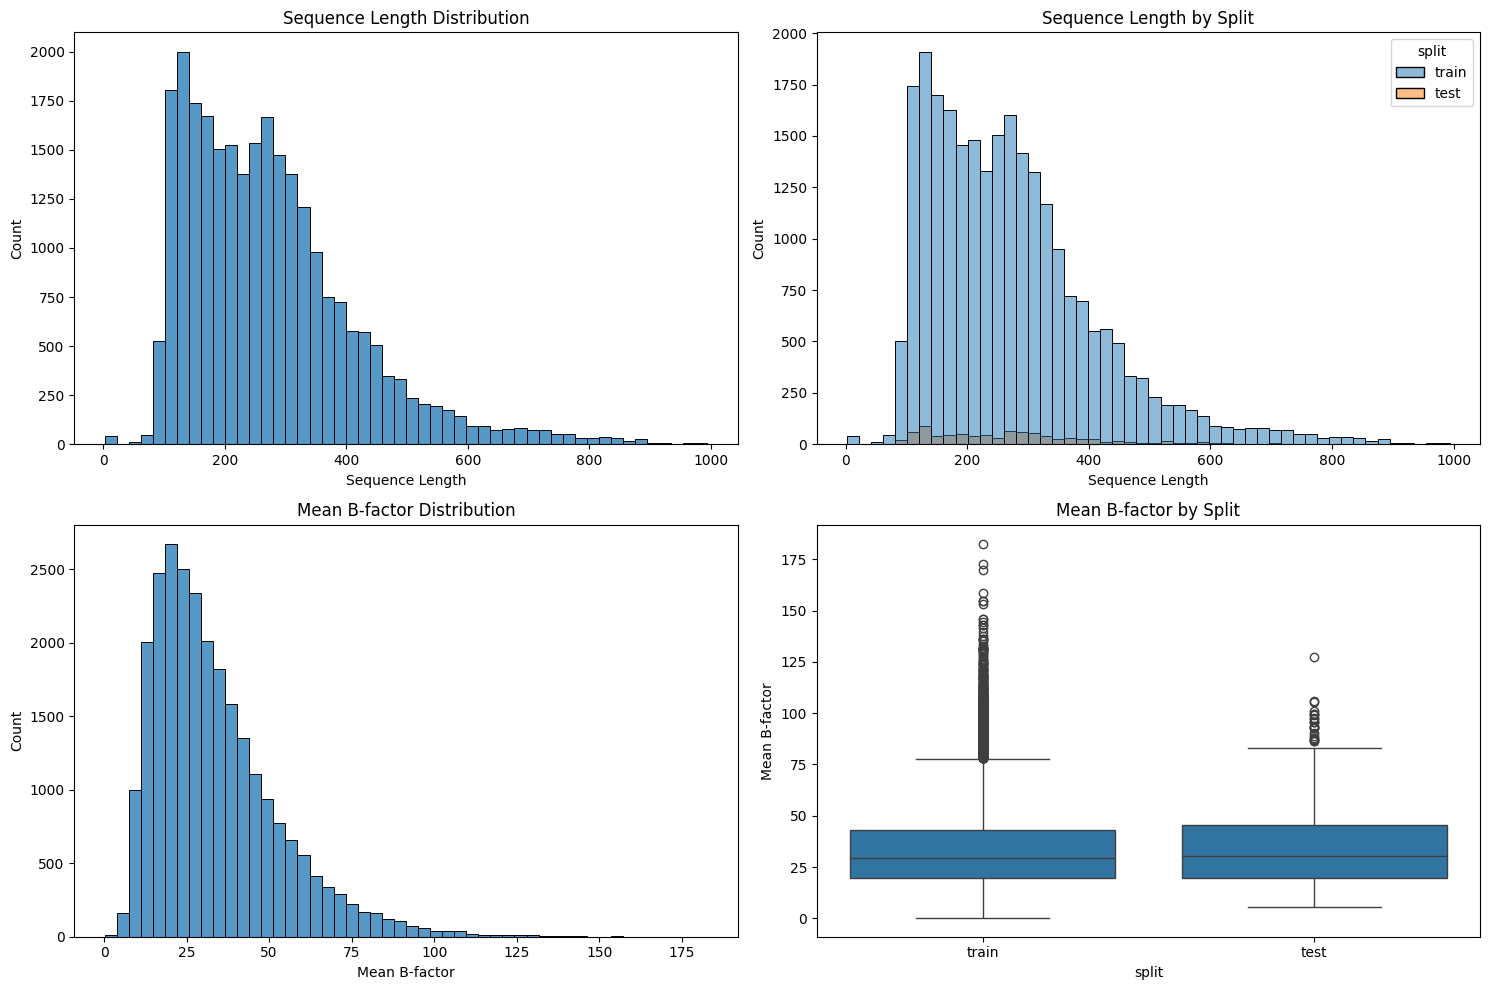


Sequence length stats by split:
         count        mean         std  min    25%    50%    75%    max
split                                                                  
test     873.0  275.898053  143.053039  9.0  161.0  261.0  345.0  875.0
train  25242.0  273.405950  140.709557  2.0  164.0  251.0  341.0  994.0

Mean B-factor stats by split:
         count       mean        std       min        25%        50%  \
split                                                                  
test     873.0  34.796946  19.267130  5.633737  19.750306  30.460661   
train  25242.0  33.617621  19.148852  0.153333  19.643563  29.203415   

             75%         max  
split                         
test   45.486281  127.178936  
train  42.952256  182.724218  

Chain distribution by PDB:
PDBs with multiple chains: 6147/15500 (39.7%)
Max chains per PDB: 24
Mean chains per PDB: 1.68


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=all_data, x='length', bins=50, ax=axes[0,0])
axes[0,0].set_title('Sequence Length Distribution')
axes[0,0].set_xlabel('Sequence Length')

sns.histplot(data=all_data, x='length', bins=50, hue='split', ax=axes[0,1])
axes[0,1].set_title('Sequence Length by Split')
axes[0,1].set_xlabel('Sequence Length')

sns.histplot(data=all_data.dropna(subset=['mean_b_factor']), x='mean_b_factor', bins=50, ax=axes[1,0])
axes[1,0].set_title('Mean B-factor Distribution')
axes[1,0].set_xlabel('Mean B-factor')

sns.boxplot(data=all_data, x='split', y='mean_b_factor', ax=axes[1,1])
axes[1,1].set_title('Mean B-factor by Split')
axes[1,1].set_ylabel('Mean B-factor')

plt.tight_layout()
plt.show()

print(f"\nSequence length stats by split:")
print(all_data.groupby('split')['length'].describe())

print(f"\nMean B-factor stats by split:")
print(all_data.groupby('split')['mean_b_factor'].describe())

print(f"\nChain distribution by PDB:")
chains_per_pdb = all_data.groupby('pdb_id')['chain_id'].nunique()
print(f"PDBs with multiple chains: {(chains_per_pdb > 1).sum()}/{len(chains_per_pdb)} ({(chains_per_pdb > 1).mean()*100:.1f}%)")
print(f"Max chains per PDB: {chains_per_pdb.max()}")
print(f"Mean chains per PDB: {chains_per_pdb.mean():.2f}")


In [12]:
def analyze_sequence_quality(df):
    print("Quality Analysis:")
    print("=" * 50)
    
    too_short = df[df['length'] < 30]
    too_long = df[df['length'] > 1000] 
    
    invalid_chars = df[df['sequence'].str.contains(r'[^ACDEFGHIKLMNPQRSTVWY]', na=False)]
    
    x_rich = df[df['sequence'].str.count('X') / df['length'] > 0.1]
    
    high_b_factor = df[df['mean_b_factor'] > 100]
    missing_b_factor = df[df['mean_b_factor'].isna()]
    
    print(f"Sequences too short (<30 aa): {len(too_short)} ({len(too_short)/len(df)*100:.2f}%)")
    print(f"Sequences too long (>1000 aa): {len(too_long)} ({len(too_long)/len(df)*100:.2f}%)")
    print(f"Sequences with invalid characters: {len(invalid_chars)} ({len(invalid_chars)/len(df)*100:.2f}%)")
    print(f"Sequences with >10% X residues: {len(x_rich)} ({len(x_rich)/len(df)*100:.2f}%)")
    print(f"High B-factor structures (>100): {len(high_b_factor)} ({len(high_b_factor)/len(df)*100:.2f}%)")
    print(f"Missing B-factor data: {len(missing_b_factor)} ({len(missing_b_factor)/len(df)*100:.2f}%)")
    
    issues = {
        'too_short': too_short.index.tolist(),
        'too_long': too_long.index.tolist(), 
        'invalid_chars': invalid_chars.index.tolist(),
        'x_rich': x_rich.index.tolist(),
        'high_b_factor': high_b_factor.index.tolist(),
        'missing_b_factor': missing_b_factor.index.tolist()
    }
    
    if len(invalid_chars) > 0:
        print(f"\nInvalid characters found:")
        for idx in invalid_chars.index[:5]:
            seq = invalid_chars.loc[idx, 'sequence']
            invalid = ''.join(set(char for char in seq if char not in 'ACDEFGHIKLMNPQRSTVWY'))
            print(f"  Index {idx}: {invalid}")
    
    if len(x_rich) > 0:
        print(f"\nExamples of X-rich sequences:")
        for idx in x_rich.index[:3]:
            seq = x_rich.loc[idx, 'sequence']
            x_count = seq.count('X')
            print(f"  Index {idx}: {x_count}/{len(seq)} X's ({x_count/len(seq)*100:.1f}%)")
    
    return issues

quality_issues = analyze_sequence_quality(all_data)


Quality Analysis:
Sequences too short (<30 aa): 40 (0.15%)
Sequences too long (>1000 aa): 0 (0.00%)
Sequences with invalid characters: 0 (0.00%)
Sequences with >10% X residues: 0 (0.00%)
High B-factor structures (>100): 200 (0.77%)
Missing B-factor data: 0 (0.00%)


In [13]:
def apply_quality_filters(df, min_length=30, max_length=1000, max_b_factor=100):
    print("\nApplying Quality Filters:")
    print("=" * 50)
    
    filters = {
        'length': (df['length'] >= min_length) & (df['length'] <= max_length),
        'valid_chars': ~df['sequence'].str.contains(r'[^ACDEFGHIKLMNPQRSTVWY]', na=False),
        'b_factor': (df['mean_b_factor'] <= max_b_factor) | df['mean_b_factor'].isna()
    }
    
    combined_filter = filters['length'] & filters['valid_chars'] & filters['b_factor']
    
    filtered_df = df[combined_filter].copy()
    
    print(f"Original sequences: {len(df)}")
    for filter_name, filter_mask in filters.items():
        passed = filter_mask.sum()
        print(f"  {filter_name}: {passed} sequences passed ({passed/len(df)*100:.1f}%)")
    
    print(f"Final filtered sequences: {len(filtered_df)} ({len(filtered_df)/len(df)*100:.2f}%)")
    print(f"Removed: {len(df) - len(filtered_df)} sequences ({(len(df) - len(filtered_df))/len(df)*100:.2f}%)")
    
    return filtered_df

filtered_data = apply_quality_filters(all_data)
print(f"\nFiltered data by split:")
print(filtered_data['split'].value_counts())

print(f"\nLength distribution after filtering:")
print(filtered_data.groupby('split')['length'].describe())

print(f"\nB-factor distribution after filtering:")
print(filtered_data.groupby('split')['mean_b_factor'].describe())



Applying Quality Filters:
Original sequences: 26115
  length: 26075 sequences passed (99.8%)
  valid_chars: 26115 sequences passed (100.0%)
  b_factor: 25915 sequences passed (99.2%)
Final filtered sequences: 25879 (99.10%)
Removed: 236 sequences (0.90%)

Filtered data by split:
split
train    25012
test       867
Name: count, dtype: int64

Length distribution after filtering:
         count        mean         std   min    25%    50%    75%    max
split                                                                   
test     867.0  276.876586  142.862584  83.0  161.0  262.0  346.0  875.0
train  25012.0  273.354590  139.923054  32.0  164.0  251.0  340.0  994.0

B-factor distribution after filtering:
         count       mean        std       min        25%        50%  \
split                                                                  
test     867.0  34.506245  18.594278  5.633737  19.781348  30.449412   
train  25012.0  32.968328  17.752239  0.153333  19.564534  29.012252   

In [14]:
train_filtered = filtered_data[filtered_data['split'] == 'train'].drop('split', axis=1)
test_filtered = filtered_data[filtered_data['split'] == 'test'].drop('split', axis=1)

print("Final filtered dataset sizes:")
print(f"Train: {len(train_filtered)} sequences")
print(f"Test: {len(test_filtered)} sequences")

# train_filtered.to_parquet("../../pipeline/output/train_data/train_filtered.parquet")
# test_filtered.to_parquet("../../pipeline/output/test_data/test_filtered.parquet")

# print("\nFiltered datasets saved!")
# print("Files created:")
# print("- ../../pipeline/output/train_data/train_filtered.parquet") 
# print("- ../../pipeline/output/test_data/test_filtered.parquet")

print(f"\nFinal statistics:")
print(f"Train sequences: {len(train_df)} -> {len(train_filtered)} ({len(train_filtered)/len(train_df)*100:.1f}% retained)")
print(f"Test sequences: {len(test_df)} -> {len(test_filtered)} ({len(test_filtered)/len(test_df)*100:.1f}% retained)")


Final filtered dataset sizes:
Train: 25012 sequences
Test: 867 sequences

Final statistics:
Train sequences: 25242 -> 25012 (99.1% retained)
Test sequences: 873 -> 867 (99.3% retained)


In [15]:
all_data_filtered = pd.concat([train_filtered, test_filtered], ignore_index=True)
all_data_filtered['split'] = ['train'] * len(train_filtered) + ['test'] * len(test_filtered)

print("Combined data shape:", all_data_filtered.shape)
print("\nData info:")
all_data_filtered.info()

print("\nLength column vs sequence length comparison:")
print("Length column statistics:")
print(all_data_filtered['length'].describe())
print("\nActual sequence length statistics:")
seq_lengths = all_data_filtered['sequence'].str.len()
print(seq_lengths.describe())

print(f"\nDo 'length' and actual sequence length match? {all_data_filtered['length'].equals(seq_lengths)}")

print("\nMean B-factor statistics:")
print(all_data_filtered['mean_b_factor'].describe())


Combined data shape: (25879, 10)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25879 entries, 0 to 25878
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               25879 non-null  object 
 1   pdb_id           25879 non-null  object 
 2   chain_id         25879 non-null  object 
 3   length           25879 non-null  int64  
 4   sequence         25879 non-null  object 
 5   residue_indices  25879 non-null  object 
 6   b_factors        25879 non-null  object 
 7   mean_b_factor    25879 non-null  float64
 8   coords_ca        25879 non-null  object 
 9   split            25879 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.0+ MB

Length column vs sequence length comparison:
Length column statistics:
count    25879.000000
mean       273.472584
std        140.021155
min         32.000000
25%        164.000000
50%        251.000000
75%        340.000000
max   

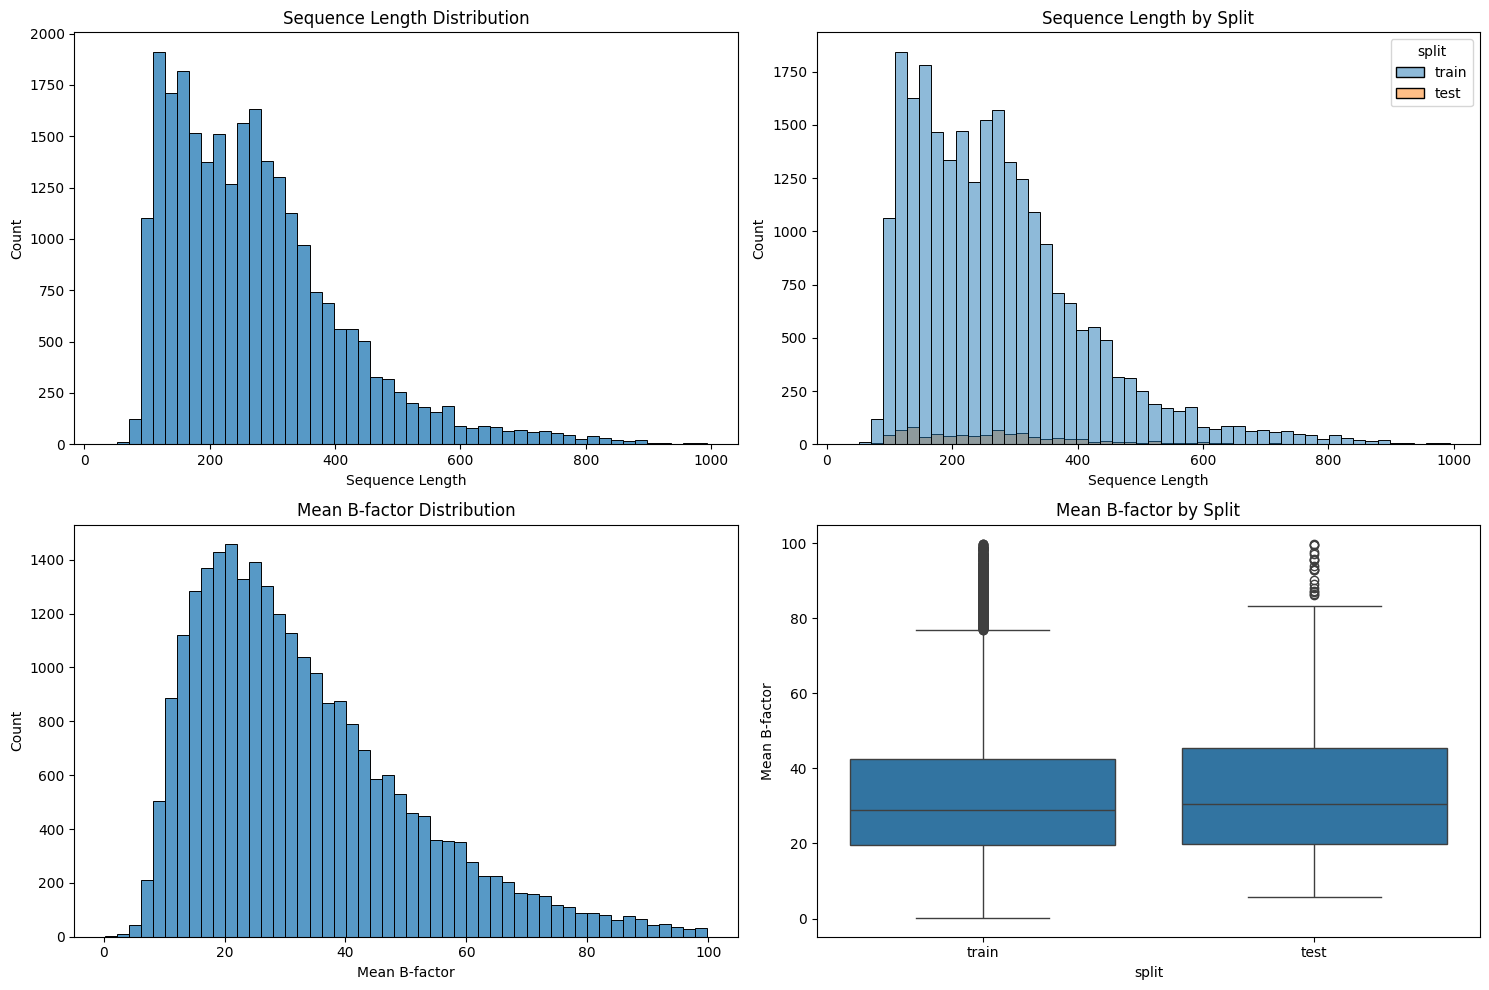


Sequence length stats by split:
         count        mean         std   min    25%    50%    75%    max
split                                                                   
test     867.0  276.876586  142.862584  83.0  161.0  262.0  346.0  875.0
train  25012.0  273.354590  139.923054  32.0  164.0  251.0  340.0  994.0

Mean B-factor stats by split:
         count       mean        std       min        25%        50%  \
split                                                                  
test     867.0  34.506245  18.594278  5.633737  19.781348  30.449412   
train  25012.0  32.968328  17.752239  0.153333  19.564534  29.012252   

             75%        max  
split                        
test   45.298393  99.740396  
train  42.511735  99.861885  

Chain distribution by PDB:
PDBs with multiple chains: 6088/15449 (39.4%)
Max chains per PDB: 24
Mean chains per PDB: 1.68


In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=all_data_filtered, x='length', bins=50, ax=axes[0,0])
axes[0,0].set_title('Sequence Length Distribution')
axes[0,0].set_xlabel('Sequence Length')

sns.histplot(data=all_data_filtered, x='length', bins=50, hue='split', ax=axes[0,1])
axes[0,1].set_title('Sequence Length by Split')
axes[0,1].set_xlabel('Sequence Length')

sns.histplot(data=all_data_filtered.dropna(subset=['mean_b_factor']), x='mean_b_factor', bins=50, ax=axes[1,0])
axes[1,0].set_title('Mean B-factor Distribution')
axes[1,0].set_xlabel('Mean B-factor')

sns.boxplot(data=all_data_filtered, x='split', y='mean_b_factor', ax=axes[1,1])
axes[1,1].set_title('Mean B-factor by Split')
axes[1,1].set_ylabel('Mean B-factor')

plt.tight_layout()
plt.show()

print(f"\nSequence length stats by split:")
print(all_data_filtered.groupby('split')['length'].describe())

print(f"\nMean B-factor stats by split:")
print(all_data_filtered.groupby('split')['mean_b_factor'].describe())

print(f"\nChain distribution by PDB:")
chains_per_pdb = all_data_filtered.groupby('pdb_id')['chain_id'].nunique()
print(f"PDBs with multiple chains: {(chains_per_pdb > 1).sum()}/{len(chains_per_pdb)} ({(chains_per_pdb > 1).mean()*100:.1f}%)")
print(f"Max chains per PDB: {chains_per_pdb.max()}")
print(f"Mean chains per PDB: {chains_per_pdb.mean():.2f}")
